Two Classes Diagonal Translation. 2 Dimensional data
100 batches of 80 instances



METHOD: Static lp as classifier
Execution time:  0.19373973099999997
Average MCC:  0.17963628763887363
Average error: 42.1375
Average macro-F1: 0.5617270318361776
Average micro-F1: 0.5786250000000001
Acurácia Média:  57.8625
Desvio Padrão:  9.969163392682459
Variância:  99.38421875000003


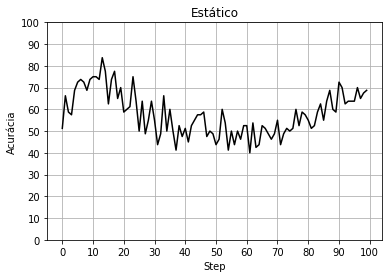

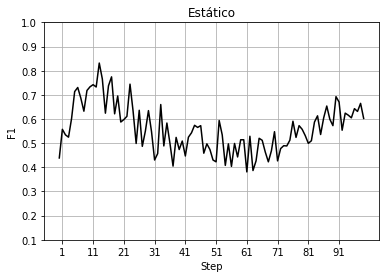

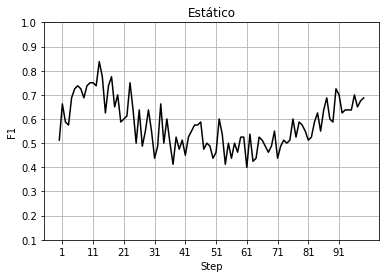




METHOD: Sliding lp as classifier
Execution time:  0.2595115649999995
Average MCC:  0.1350934984653893
Average error: 43.975
Average macro-F1: 0.42292709468721484
Average micro-F1: 0.56025
Acurácia Média:  56.025
Desvio Padrão:  13.980320990592453
Variância:  195.44937499999995


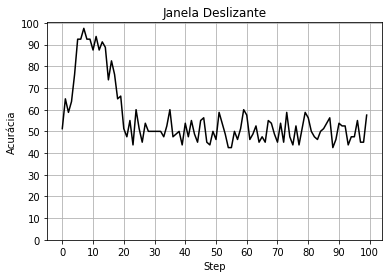

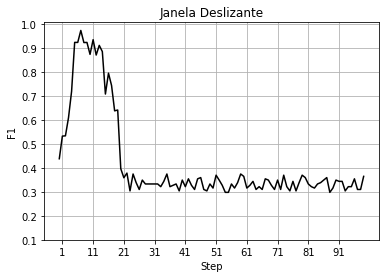

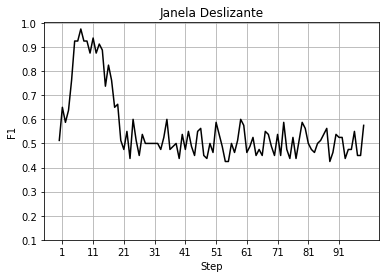




METHOD: Incremental lp as classifier
Execution time:  3.145785569000001
Average MCC:  0.16208494241154792
Average error: 43.15
Average macro-F1: 0.5477608081306709
Average micro-F1: 0.5684999999999999
Acurácia Média:  56.85
Desvio Padrão:  10.296358579614447
Variância:  106.01500000000003


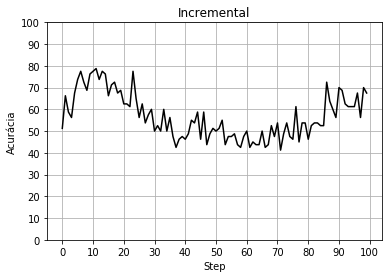

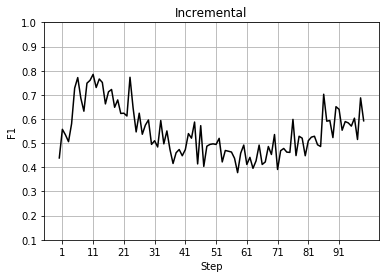

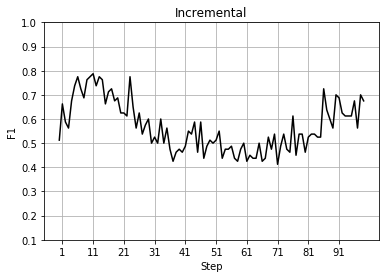




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  0.3231253949999999
Average MCC:  0.6158221511108039
Average error: 20.112499999999997
Average macro-F1: 0.7540130737074416
Average micro-F1: 0.798875
Acurácia Média:  79.8875
Desvio Padrão:  19.015696641196186
Variância:  361.5967187499999


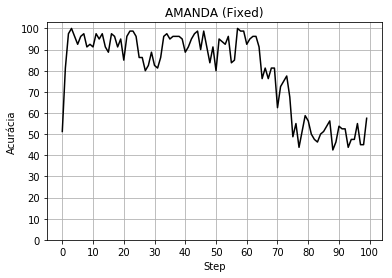

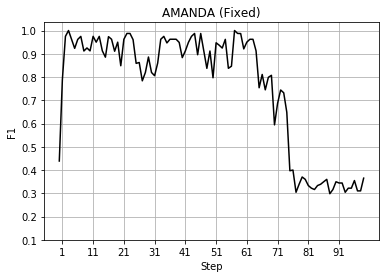

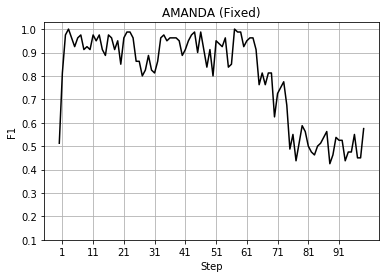




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
AMANDA-DCP Hellinger | Mean keeping percentage=0.28 | Std keeping percentage=0.17
Execution time:  0.38424913999999966
Average MCC:  -0.28101735649890525
Average error: 64.4625
Average macro-F1: 0.3463269528248115
Average micro-F1: 0.355375
Acurácia Média:  35.5375
Desvio Padrão:  38.343943051673754
Variância:  1470.25796875


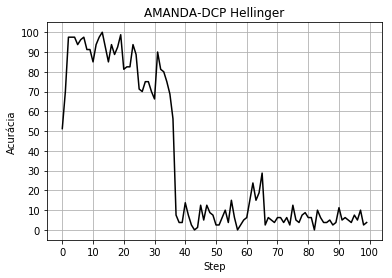

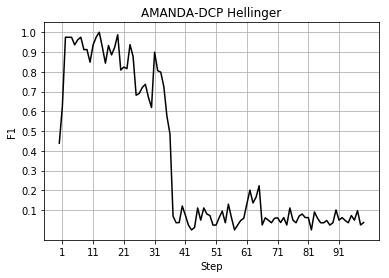

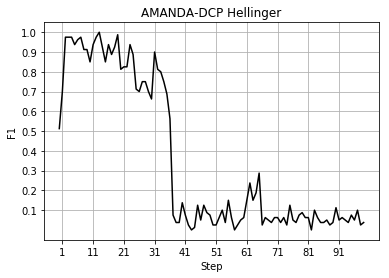




METHOD: lp as classifier and kde and Hellinger2 distance as dynamic CSE
AMANDA-DCP Hellinger2 | Mean keeping percentage=0.30 | Std keeping percentage=0.08
Execution time:  0.35804774100000003
Average MCC:  0.0014121975762272057
Average error: 49.975
Average macro-F1: 0.3331217675132394
Average micro-F1: 0.5002499999999999
Acurácia Média:  50.025
Desvio Padrão:  4.7761778651972335
Variância:  22.811875000000004


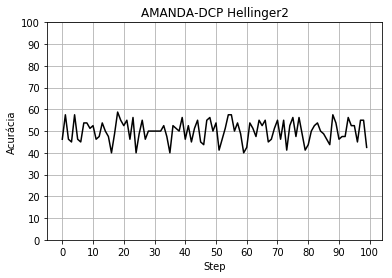

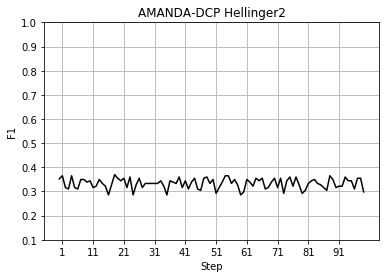

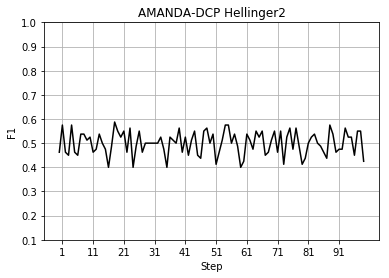




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -1.000 | Mean keeping percentage=0.25 | Std keeping percentage=0.10
Execution time:  0.3505091199999999
Average MCC:  0.5939981902878511
Average error: 21.1875
Average macro-F1: 0.7417159842624522
Average micro-F1: 0.788125
Acurácia Média:  78.8125
Desvio Padrão:  18.686036732009278
Variância:  349.16796874999994


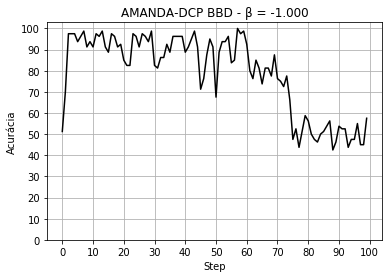

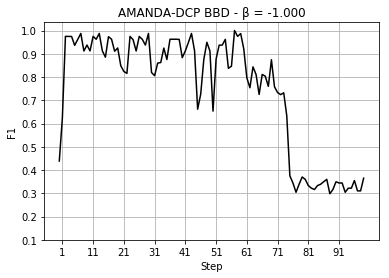

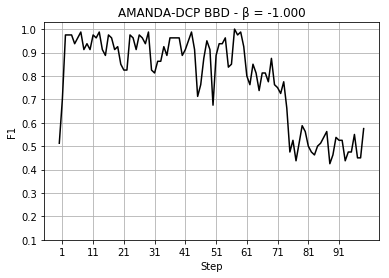

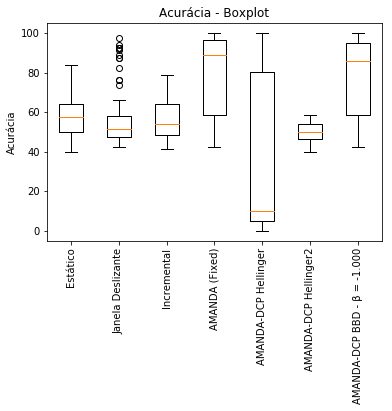

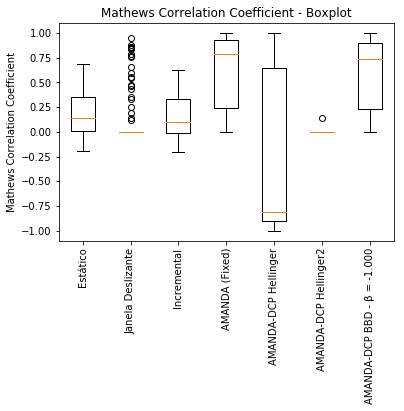

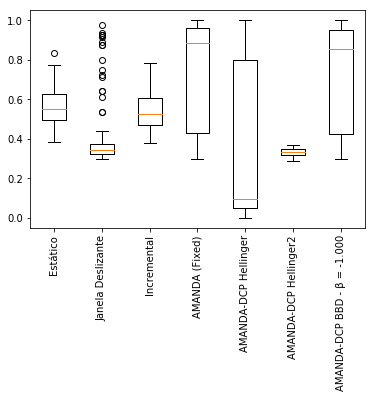

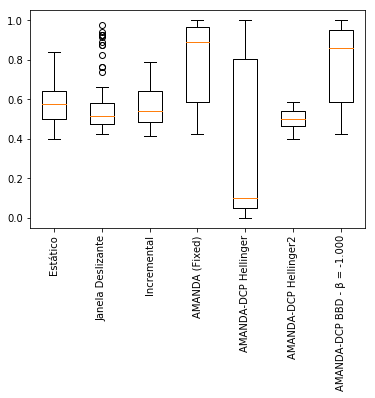

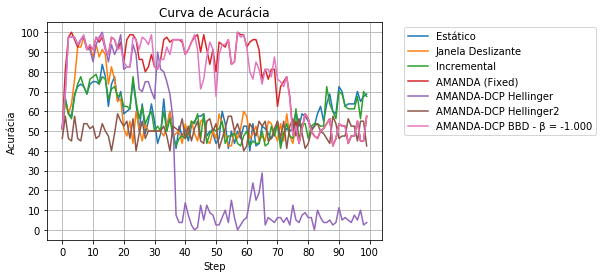

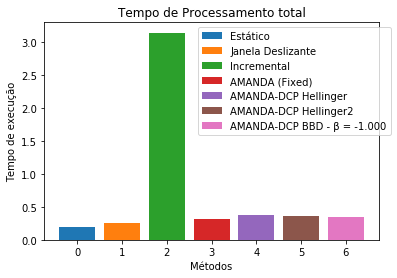

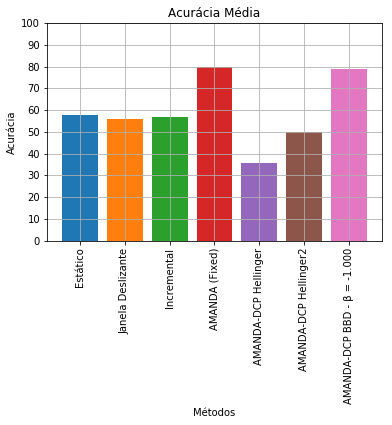

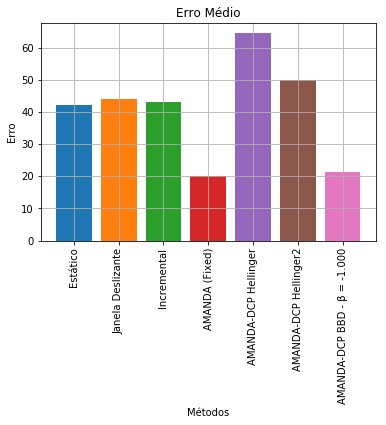

Pos 5 - Redução do Erro (Janela Deslizante):-3.1756318859364847
Pos 4 - Redução do Erro (Incremental):-1.749837977964996
Pos 1 - Redução do Erro (AMANDA (Fixed)):38.064376755238726
Pos 7 - Redução do Erro (AMANDA-DCP Hellinger):-38.58284726722834
Pos 6 - Redução do Erro (AMANDA-DCP Hellinger2):-13.545042125729099
Pos 2 - Redução do Erro (AMANDA-DCP BBD - β = -1.000):36.206524087275874


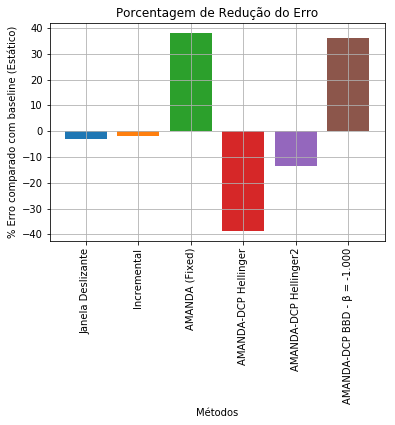

In [1]:
%matplotlib inline
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[4])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version
from methods import prequential_amanda_fixed
from methods import prequential_amanda_dynamic
from methods import prequential_static_classifier
from methods import prequential_deslizante_LN
from methods import prequential_incremental_LN
from methods import prequential_compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None, distanceMetric=None, beta=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K
        self.distanceMetric = distanceMetric
        self.beta = beta


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, nb = naive bayes, knn = k-nn, sgd = stochastic gradient descent
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.load2CDT(path, sep)
    
    # 5% of initial labeled data
    labeledData = int(0.5*len(dataLabels))
    
    # Static SSL
    experiments[0] = Experiment(static_classifier, 2, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 2, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 2, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 2, 0.85, "kde", clfName=sslClassifier)

    # Proposed method 2 (AMANDA - DCP Original)
    experiments[4] = Experiment(amanda_dynamic, 2, None, "kde", sslClassifier, 'Hellinger')
    
    # Proposed method 3 (AMANDA - DCP Hellinger2)
    experiments[5] = Experiment(amanda_dynamic, 6, None, "kde", sslClassifier, 'Hellinger2')                         
    
    # Proposed method 4 (AMANDA - DCP BBD)
    lastIndex = list(experiments.keys())[-1]
    #betas = [-1, 2, 3, 10]
    #bestK = [2, 2, 2, 2]
    betas = [-1]
    bestK = [2]
    for i in range(len(betas)):
        experiments[lastIndex+1+i] = Experiment(amanda_dynamic, bestK[i], None, "kde", sslClassifier, 'BBD', beta=betas[i])
    
    # Proposed method 5 (AMANDA - DCP HDDDM)
    #experiments[17] = Experiment(amanda_dynamic, 4, None, "kde", sslClassifier, 'HDDDM')    
    
    # COMPOSE GMM (Python version)
    #experiments[5] = Experiment(compose_gmm_version, 12)
    
    
    '''
    #prequential evaluation
    steps = 10
    dataValues, dataLabels = dataValues[:labeledData], dataLabels[:labeledData]
    labeledData = int(0.05*len(dataLabels))
    experiments[0] = Experiment(prequential_static_classifier, 12, clfName=sslClassifier)
    experiments[1] = Experiment(prequential_deslizante_LN, 12, clfName=sslClassifier)
    experiments[2] = Experiment(prequential_incremental_LN, 12, clfName=sslClassifier)
    experiments[3] = Experiment(prequential_amanda_fixed, 12, 0.75, "kde", sslClassifier)
    experiments[4] = Experiment(prequential_amanda_dynamic, 9, None, "kde", clfName=sslClassifier)
    experiments[5] = Experiment(prequential_compose_gmm_version, 12, 0.75)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '2CDT', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw[:labeledData], "accuracies":originalAccsLevelIw[:labeledData], "time":timeLevelIw})
    '''
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()